# **Predicting Compressive Strength of Concrete**

**Featurization, Model Selection and Tuning Tutorial**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#!pip install pyforest

In [4]:
from pyforest import *
lazy_imports()

['import altair as alt',
 'from sklearn.model_selection import KFold',
 'import sklearn',
 'import xgboost as xgb',
 'import textblob',
 'import os',
 'from sklearn.linear_model import Lasso',
 'from sklearn.linear_model import Ridge',
 'from sklearn import metrics',
 'from pathlib import Path',
 'from fbprophet import Prophet',
 'import dash',
 'import matplotlib.pyplot as plt',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import ElasticNetCV',
 'import matplotlib as mpl',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.cluster import KMeans',
 'import bokeh',
 'from sklearn.linear_model import LogisticRegression',
 'import seaborn as sns',
 'from xlrd import open_workbook',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import plotly.express as px',
 'import pandas as pd',
 'from dask import dataframe as dd',
 'import statsmodels.api as sm',
 'from scipy import

In [5]:
df = pd.read_csv('compresive_strength_concrete+2.csv')

<IPython.core.display.Javascript object>

In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Observation
  1. It shows that there are eight independent variables(cement, slag, ash,water,superplastic,coarseagg,fineagg,age)and one dependent variable(strength)
  2. All the records are numeric

In [7]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water  (component 4)(kg in a m^3 mixture)':'water',
                        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic',
                        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals) ':'strength'})

In [8]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [10]:
df.shape

(1030, 9)

In [11]:
#Checking for missing values


df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


1. It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataframe.
2. We can see that cement,slag,ash are left skewed

## **Exploratory Data Analysis**

**CEMENT**

In [13]:
#Quartiles
"""
Lower_Fence = Q1 - 1.5 * (IQR)
Upper_Fence = Q3 + 1.5 * (IQR)
*Both Inclusive*
[Lower_Fence, Upper_Fence]
"""
from scipy import stats

Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is:', Q1)
print('3rd Quartile (Q3) is:', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is: 192.375
3rd Quartile (Q3) is: 350.0
Interquartile range (IQR) is  157.625


In [14]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in cement:', L_outliers)
print('Upper outliers limit in cement:', U_outliers)

Lower outliers limit in cement: -44.0625
Upper outliers limit in cement: 586.4375


In [15]:
#Checking for presence of outliers with the upper and lower limits

print('Number of outliers in cement upper :', df[df['cement'] > 586.4375]['cement'].count())
print('Number of outliers in cement lower :', df[df['cement'] < -44.0625]['cement'].count())


print('% of Outlier in cement upper:', round(df[df['cement'] > 586.4375]['cement'].count()*100/len(df)),'%')
print('% of Outlier in cement lower:', round(df[df['cement'] < -44.0625]['cement'].count()*100/len(df)),'%')

Number of outliers in cement upper : 0
Number of outliers in cement lower : 0
% of Outlier in cement upper: 0 %
% of Outlier in cement lower: 0 %


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='cement'>

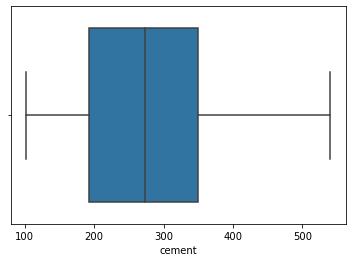

In [16]:
#Distribution of CEMENT

sns.boxplot(x='cement', data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

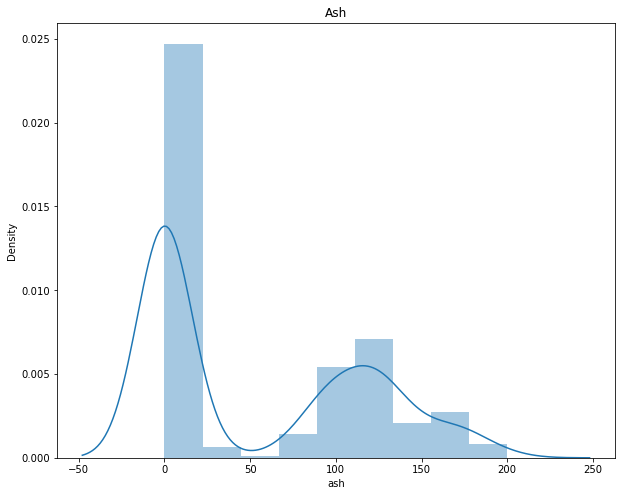

In [17]:
#distplot

plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title("Ash");

<br>

### **Water**



**From the describe function above:**

Minimum water: 121.8

Maximum water: 247.0

Mean value: 181.56728155339803

Median value: 185.0

Standard deviation: 21.354218565032525

Null values: 0

In [18]:
#Quartiles
w_Q1=df['water'].quantile(q=0.25)
w_Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is:', w_Q1)
print('3rd Quartile (Q2) is:', w_Q3)
print('Interquartile range (IQR) is', stats.iqr(df['water']))

1st Quartile (Q1) is: 164.9
3rd Quartile (Q2) is: 192.0
Interquartile range (IQR) is 27.099999999999994


In [19]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)
print('Lower outliers in water:', WL_outliers)
print('Upper outliers in water:', WU_outliers)

Lower outliers in water: 124.25000000000001
Upper outliers in water: 232.64999999999998


In [20]:
#Checking for presence of outliers with the upper and lower limits

print('Number of outliers in water upper :', df[df['water'] > 232.64999999999998]['water'].count())
print('Number of outliers in water lower :', df[df['water'] < 124.25000000000001]['water'].count())


# print('% of Outlier in water upper:', round(df[df['water'] > 232.64999999999998]['water'].count()*100/len(df)),'%')
# print('% of Outlier in water lower:', round(df[df['water'] < 124.25000000000001]['water'].count()*100/len(df)),'%')

Number of outliers in water upper : 4
Number of outliers in water lower : 5


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='water'>

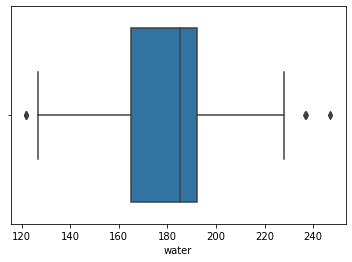

In [21]:
#Distribution of WATER

sns.boxplot(x='water', data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'water')

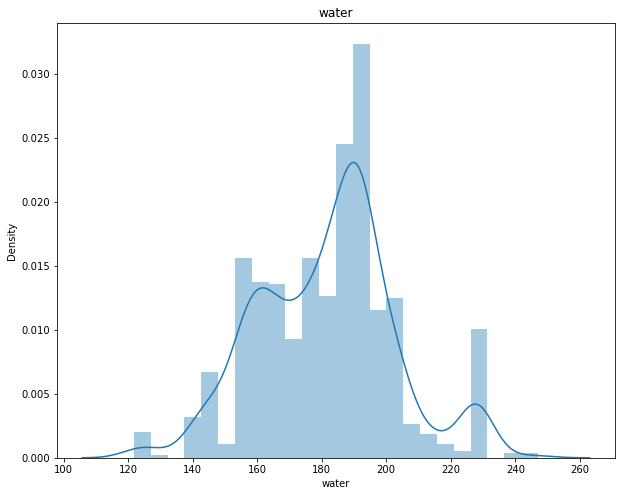

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title("water")

<br>

### **Slag**

1st Quartile (Q1) is: 0.0

3rd Quartile (Q3) is: 142.95

Interquartile range (IQR) is 142.95

In [23]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)

In [24]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag:', L_outliers)
print('Upper outliers in slag:', U_outliers)

Lower outliers in slag: -214.42499999999998
Upper outliers in slag: 357.375


In [25]:
print('Number of outliers in slag upper :', df[df['slag'] > 357.375]['slag'].count())
print('Number of outliers in slag lower :', df[df['slag'] < -214.425]['slag'].count())


# print('% of Outlier in slag upper:', round(df[df['slag'] > 357.375]['slag'].count()*100/len(df)),'%')
# print('% of Outlier in slag lower:', round(df[df['slag'] < -214.425]['slag'].count()*100/len(df)),'%')

Number of outliers in slag upper : 2
Number of outliers in slag lower : 0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='slag'>

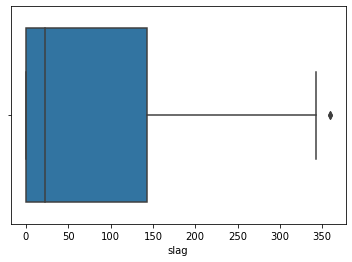

In [26]:
#Distribution of SLAG

sns.boxplot(x='slag', data=df, orient='h')

<br>

## **Age**

Minimum age: 1

Maximum age: 365

Mean value: 45.662135922330094

Median value: 28.0

Standard deviation: 63.169911581033155

Null values: False

In [27]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)

In [28]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age:', L_outliers)
print('Upper outliers in age:', U_outliers)

Lower outliers in age: -66.5
Upper outliers in age: 129.5


In [29]:
print('Number of outliers in age upper :', df[df['age'] > 129.5]['age'].count())
print('Number of outliers in age lower :', df[df['age'] < -66.5]['age'].count())


# print('% of Outlier in age upper:', round(df[df['age'] > 129.5]['age'].count()*100/len(df)),'%')
# print('% of Outlier in age lower:', round(df[df['age'] < -66.5]['age'].count()*100/len(df)),'%')

Number of outliers in age upper : 59
Number of outliers in age lower : 0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age'>

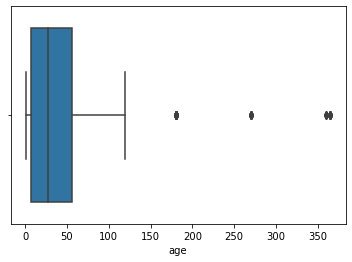

In [30]:
#Distribution of AGE

sns.boxplot(x='age', data=df, orient='h')

<br>

## **Ash**

Minimum ash: 0.0

Maximum ash: 200.1

Mean value: 54.18834951456309

Median value: 0.0

Standard deviation: 63.99700415268812

In [31]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)

In [32]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ash:', L_outliers)
print('Upper outliers in Ash:', U_outliers)

Lower outliers in Ash: -177.45
Upper outliers in Ash: 295.75


In [33]:
print('Number of outliers in Ash upper :', df[df['ash'] > 295.75]['ash'].count())
print('Number of outliers in Ash lower :', df[df['ash'] < -177.45]['ash'].count())


# print('% of Outlier in Ash upper:', round(df[df['ash'] > 295.75]['ash'].count()*100/len(df)),'%')
# print('% of Outlier in Ash lower:', round(df[df['ash'] < -177.45]['ash'].count()*100/len(df)),'%')

Number of outliers in Ash upper : 0
Number of outliers in Ash lower : 0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ash'>

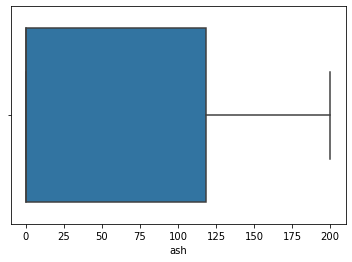

In [34]:
#Distribution of ASH

sns.boxplot(x='ash', data=df, orient='h')

<br>


## Multivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

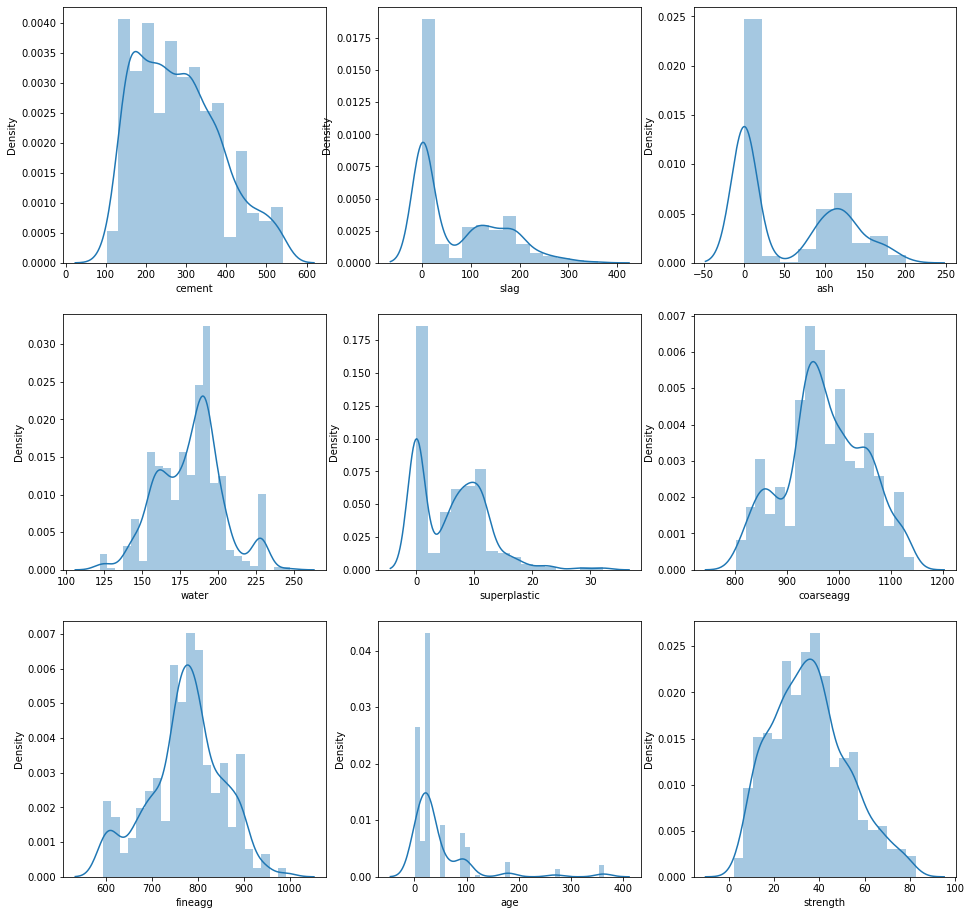

In [35]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2]);

**Observation**

##### **We can see observe that:**

cement is almost normal.

slag has three gaussians and rightly skewed.

ash has two gaussians and rightly skewed.

water has three gaussians and slightly left skewed.

superplastic has two gaussians and rightly normal.

coarseagg has three gaussians and almost normal.

fineagg has almost two gaussians and look like normal.

age has multiple gaussians and righlty skewed.

<IPython.core.display.Javascript object>

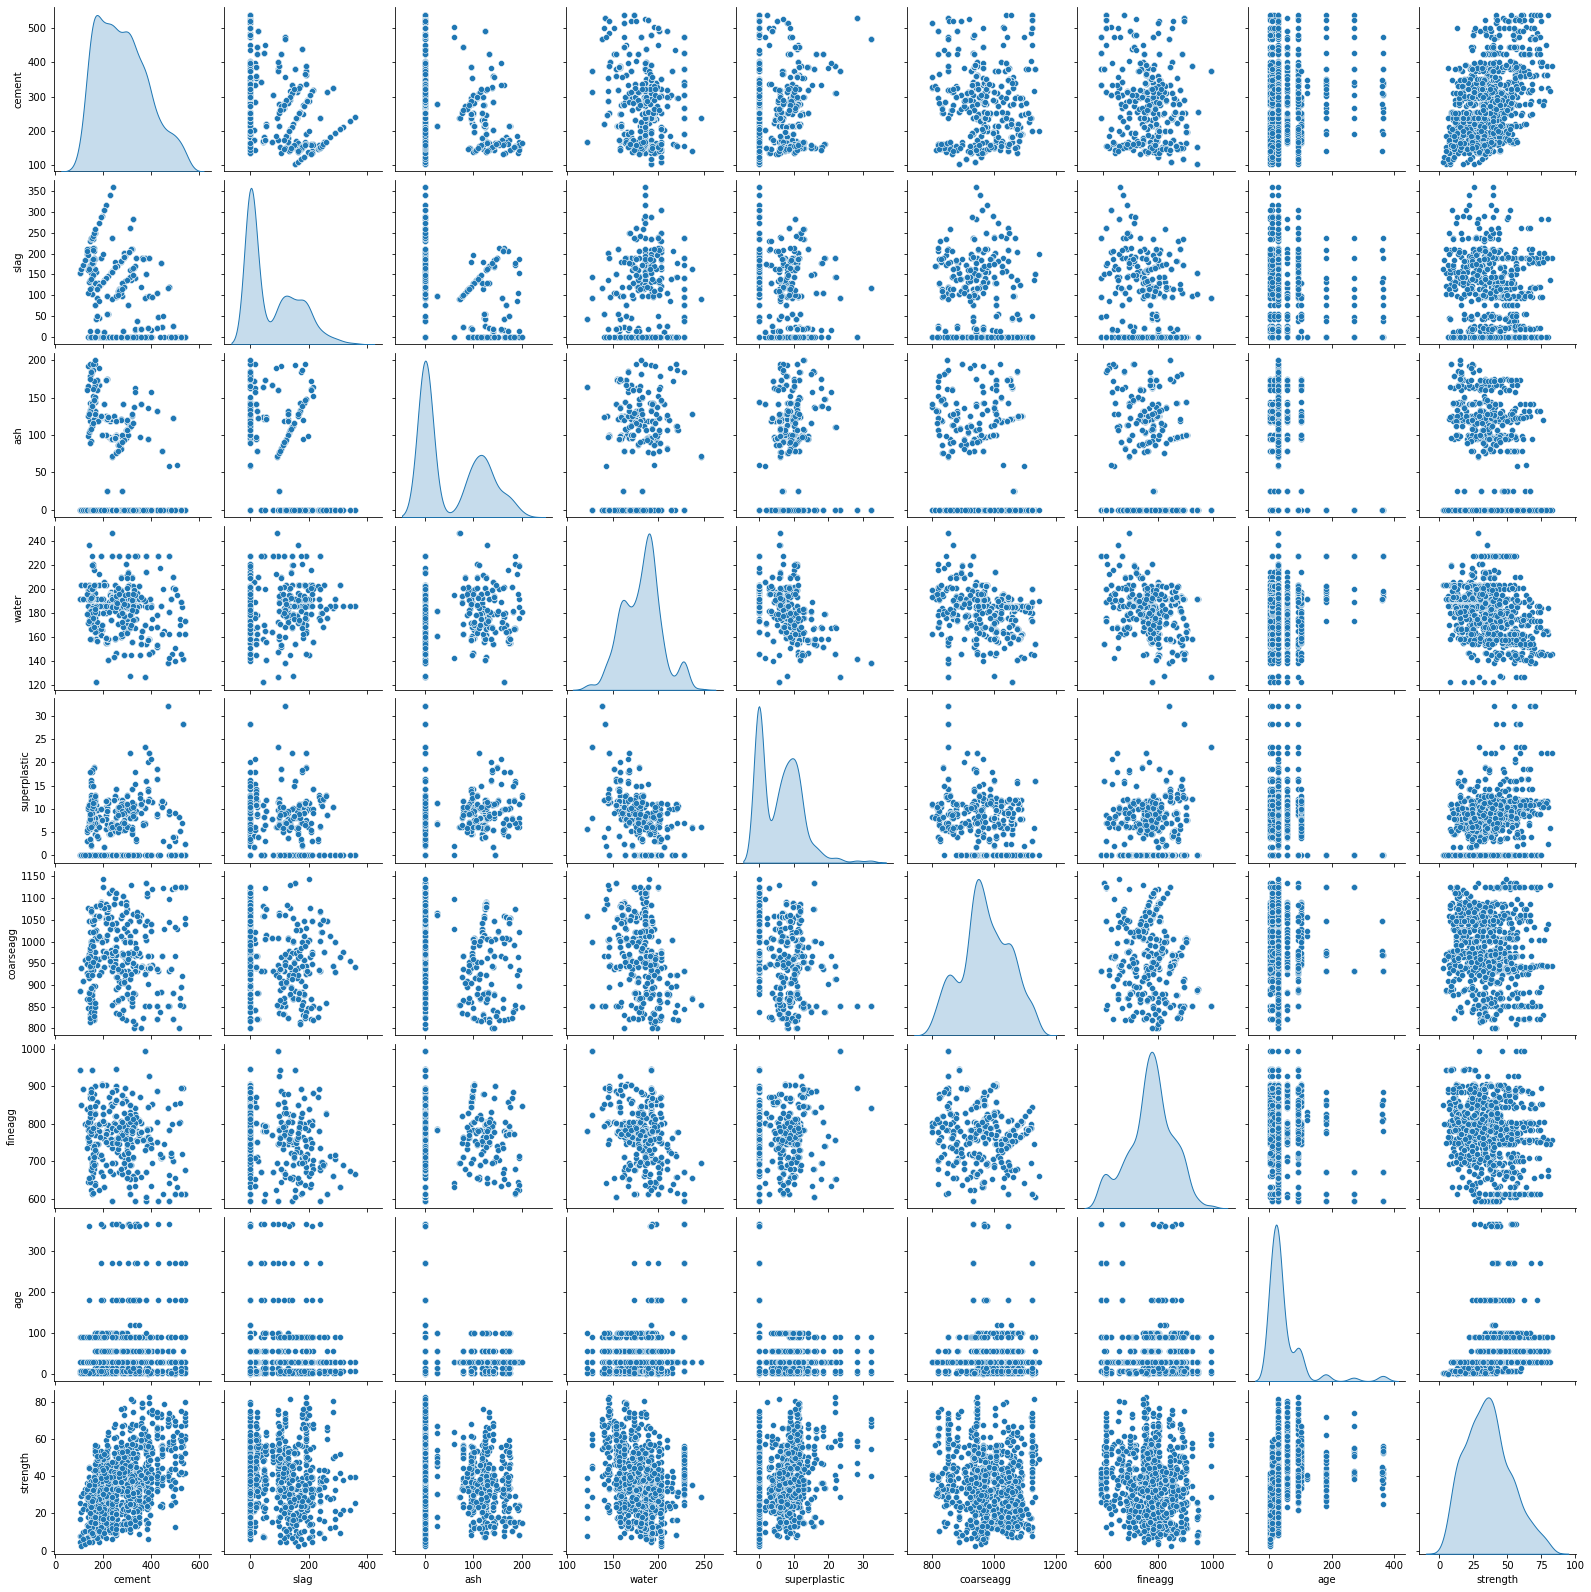

In [36]:
# pairplot - plot density curve instead of histogram in diagonal

sns.pairplot(df, diag_kind='kde')

In [37]:
# cols = [i for i in df.columns if i not in 'strength']
# length = len(cols)

# plt.figure(figsize=(13,27))
# for i, j in itertools.zip_longest(cols, range(length)):
#     plt.subplot(4,2,j+1)
#     sns.kdeplot(df[i],
#                 df['strength'],
#                 cmap='hot',
#                 shade=True)
#     plt.title(i+' & strength',color='navy')

<br>

## Correlation between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

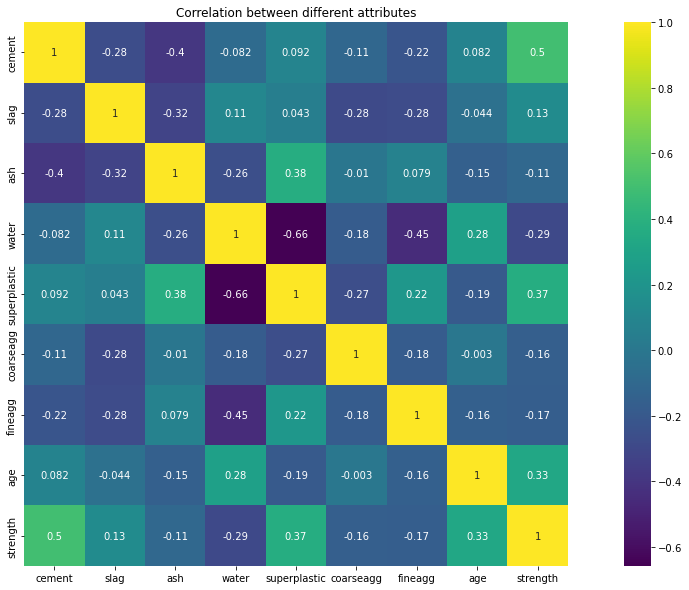

In [38]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show();

<AxesSubplot:>

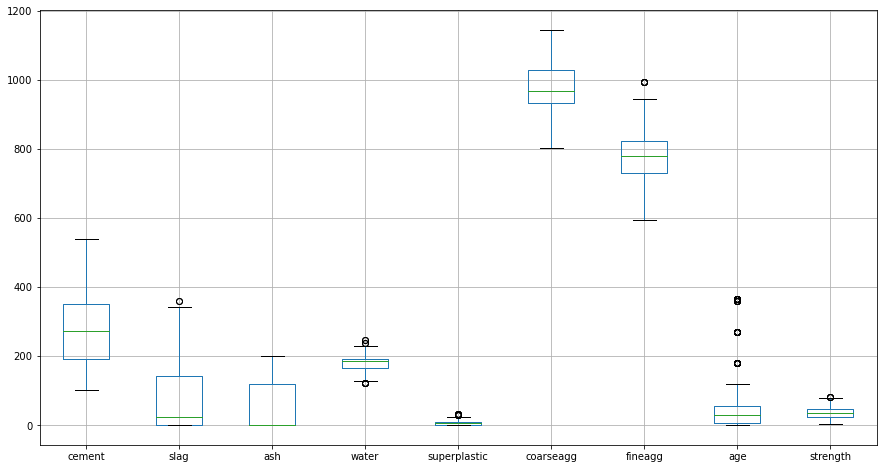

In [39]:
df.boxplot(figsize=(15,8))

## Checking for outliers

In [40]:
print('Outliers in cement:', df[((df.cement - df.cement.mean())/df.cement.std()).abs() > 3]['cement'].count())
print('Outliers in slag:', df[((df.slag - df.slag.mean())/df.slag.std()).abs() > 3]['slag'].count())
print('Outliers in ash:', df[((df.ash - df.ash.mean())/df.ash.std()).abs() > 3]['ash'].count())
print('Outliers in water:', df[((df.water - df.water.mean())/df.water.std()).abs() > 3]['water'].count())
print('Outliers in superplastic:', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs() > 3]['superplastic'].count())
print('Outliers in coarseagg:', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs() > 3]['coarseagg'].count())
print('Outliers in fineagg:', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs() > 3]['fineagg'].count())
print('Outliers in age:', df[((df.age - df.age.mean())/df.age.std()).abs() > 3]['age'].count())

Outliers in cement: 0
Outliers in slag: 4
Outliers in ash: 0
Outliers in water: 2
Outliers in superplastic: 10
Outliers in coarseagg: 0
Outliers in fineagg: 0
Outliers in age: 33


## Replacing the outliers by median

In [41]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(q=0.25)
    Q3 = df[cols].quantile(q=0.75)
    iqr = Q3 - Q1

    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[cols]<low) | (df[cols] > high), cols] = df[cols].median()

<AxesSubplot:>

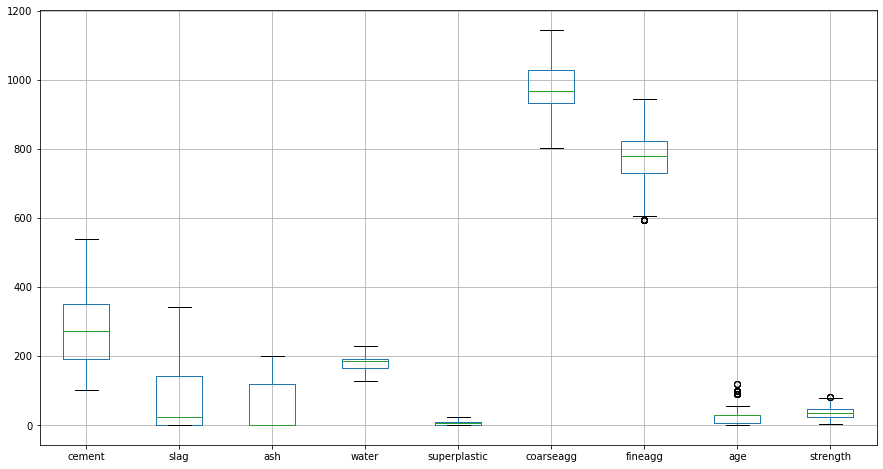

In [42]:
df.boxplot(figsize=(15,8))

#### Feature Engineering and Model Building

In [43]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [44]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X = df.drop('strength', axis=1)
y = df['strength']

In [45]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

<br>

### Building Different Models




<br>

##### Random Forest

In [47]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([23.3077    , 12.7398    , 23.16225   , 13.0563    , 33.07064762,
       62.8132    , 22.1421    , 49.90874381, 40.37373333, 18.5318    ,
       36.5137    , 13.8085    , 38.83889833, 32.66391667, 12.1228    ,
       29.3903    , 35.340935  , 55.2061    , 60.9151    , 30.2572    ,
       25.7112    , 51.285     , 16.2378    , 60.51439167, 62.9086    ,
       43.610275  , 35.01938   , 32.3652    , 34.39123333, 13.167     ,
       38.87538333, 51.620075  , 29.32214667, 21.1852    , 34.7247    ,
       37.9341    , 15.5648    , 27.59289667, 24.5191    , 11.6543    ,
       31.638     , 15.4675    , 46.83445   , 39.03065   , 30.6078    ,
       26.8832    , 32.80685   , 24.05605   , 32.48029286, 50.553     ,
       26.14309   , 35.24248571, 61.2268    , 54.2747    , 60.3871    ,
        9.015     , 29.6825    , 23.3085    , 32.6157    , 43.8285    ,
       45.51504595, 39.82427333, 49.7653    , 48.4675    , 27.1645    ,
       34.85095   , 61.2268    , 39.2501    , 48.28504762, 26.83

In [50]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9811820794430031

In [51]:
#Model Performance on Testing Data

model.score(X_test, y_test)

0.8730097691200202

In [52]:
acc_R = metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.8730097691200202

In [53]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

33.28505371801856

In [54]:
#Store the accuracy results for each model in a dataframe for final comparison
result_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R}, index=[1])
results = result_1[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.87301


<br>

## KFold Cross Validation

In [55]:
k = 20 

kfold = KFold(n_splits=k)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7617062709328434

In [56]:
K_results

array([0.60233613, 0.81715646, 0.40791776, 0.96323102, 0.78873978,
       0.8299748 , 0.6471469 , 0.68202902, 0.37716111, 0.54109607,
       0.80289285, 0.67935787, 0.8753293 , 0.84755764, 0.8646409 ,
       0.82133763, 0.9101419 , 0.94664219, 0.87765931, 0.95177677])

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': [accuracy]}, index=[2])
results = pd.concat([results, random_re])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706


<br>

## Gradient Boosting Regressor

In [58]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [59]:
y_pred = model.predict(X_test)

In [60]:
model.score(X_train, y_train)

0.9477368610390589

In [61]:
acc_G = metrics.r2_score(y_test, y_pred)
acc_G

<IPython.core.display.Javascript object>

0.8802842683846106

In [62]:
model.score(X_test, y_test)

0.8802842683846106

In [63]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

31.37835509155161

In [64]:
#Store the accuracy results for each model in a dataframe for final comparison
gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': [model.score(X_test, y_test)]}, index=[3])
results = pd.concat([results, gradient_re])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284


## KFold Cross Validation

In [65]:
k=20
kfold = KFold(n_splits=k)
result_3 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(result_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.769666001641492

In [66]:
#Store the accuracy results for each model in a dataframe for final comparison
gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]}, index=[4])
results = pd.concat([results, gradient_k])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666


<br>

## Ada Boosting Regressor

In [67]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [68]:
y_pred = model.predict(X_test)

In [69]:
model.score(X_train, y_train)

0.8252116778097682

In [70]:
aa_Ada = metrics.r2_score(y_test, y_pred)
aa_Ada

<IPython.core.display.Javascript object>

0.7573892811904985

In [71]:
model.score(X_test, y_test)

0.7573892811904985

In [72]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

63.59001595778996

In [73]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boosting Regressor'], 'accuracy': [model.score(X_test, y_test)]}, index=[5])
results = pd.concat([results, acc_Ada])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389


### K fold cross validation

In [74]:
k=20
kfold = KFold(n_splits=k)
result_4 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(result_4))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5956168325782847

In [75]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]}, index=[6])
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617


<br>

## KNN Regressor

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
#Checking for different values of neighbors to determine K


diff_k=[]
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

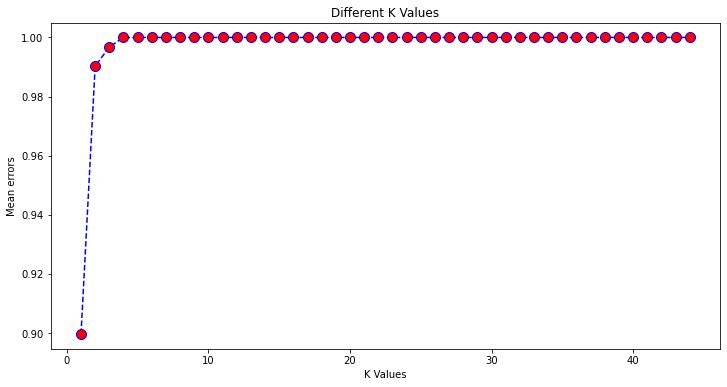

In [78]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [79]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [80]:
y_pred = model.predict(X_test)

In [81]:
model.score(X_train, y_train)

0.9069857173257587

In [82]:
acc_KNN = metrics.r2_score(y_test, y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.7538075164015781

In [83]:
model.score(X_test, y_test)

0.7538075164015781

In [84]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

64.52882229413879

In [85]:
KNN_df = pd.DataFrame({'Algorithm': ['KNN Regressor'], 'accuracy': [acc_KNN]}, index=[7])
results = pd.concat([results, KNN_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808


## KFold Validation

In [86]:
k=20
kfold = KFold(n_splits=k)
result_5 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(result_5))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6907963408592752

In [87]:
KNNKfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': [accuracy]}, index=[8])
results = pd.concat([results, KNNKfold_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796


## Bagging Regressor

In [88]:
from sklearn.ensemble import BaggingRegressor

In [89]:
model = BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [90]:
y_pred = model.predict(X_test)

In [91]:
model.score(X_train, y_train)

0.9747938651090293

In [92]:
model.score(X_test, y_test)

0.8512909421008978

In [93]:
acc_BR = metrics.r2_score(y_test, y_pred)
acc_BR

<IPython.core.display.Javascript object>

0.8512909421008978

In [94]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

38.97771463385763

In [95]:
Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': [acc_BR]}, index=[9])
results = pd.concat([results, Bagging_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291


### KFold Cross Validation

In [96]:
k=20
kfold = KFold(n_splits=k)
result_6 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(result_6))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7348122964792805

In [97]:
BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': [accuracy]}, index=[10])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


### Support Vector Regressor

In [98]:
from sklearn.svm import SVR

In [99]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [100]:
y_pred = model.predict(X_test)

In [101]:
model.score(X_train, y_train)

0.7296525761559521

In [102]:
model.score(X_test, y_test)

0.6549962611822545

In [103]:
acc_SVR = metrics.r2_score(y_test, y_pred)
acc_SVR

<IPython.core.display.Javascript object>

0.6549962611822545

In [104]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

90.4279636306755

In [105]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': [acc_SVR]}, index=[11])
results = pd.concat([results, SVR_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


**KFold Cross Validation SVR**

In [106]:
k=10
kfold = KFold(n_splits=k)
result_7 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(result_7))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6672259701584812

In [107]:
SVRKFold_df = pd.DataFrame({'Algorithm': ['SVR k fold'], 'accuracy': [accuracy]}, index=[12])
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


### **XGBoost Regressor**

In [108]:
!pip install xgboost

In [109]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [110]:
y_pred = xgr.predict(X_test)

In [111]:
xgr.score(X_train, y_train)

0.9924341146964205

In [112]:
xgr.score(X_test, y_test)

0.9004226612596836

In [113]:
acc_XGR = metrics.r2_score(y_test, y_pred)
acc_XGR

<IPython.core.display.Javascript object>

0.9004226612596836

In [114]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

26.09993734243447

In [115]:
XGB_df = pd.DataFrame({'Algorithm': ['XGBoost'], 'accuracy': [acc_XGR]}, index=[13])
results = pd.concat([results, XGB_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


### **Decision Tree Regression**

In [116]:
from sklearn.tree import DecisionTreeRegressor

In [117]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [118]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.308535
slag            0.059999
ash             0.009342
water           0.121717
superplastic    0.048828
coarseagg       0.026713
fineagg         0.051891
age             0.372975


As we can see, **Cement, Age** and **Water** are the most important features

In [119]:
y_pred = dec_model.predict(X_test)

In [120]:
dec_model.score(X_train, y_train)

0.9930841416603411

In [121]:
dec_model.score(X_test, y_test)

0.7472925804823622

In [122]:
acc_DT = metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7472925804823622

In [123]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

66.23643389967638

In [124]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree'], 'accuracy': [acc_DT]}, index=[14])
results = pd.concat([results, DT_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


## KFold Cross Validation

In [125]:
k=18

kfold = KFold(n_splits=k)
result_8 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(result_8))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6642032728207741

In [126]:
DecKFold_df = pd.DataFrame({'Algorithm': ['Decision Tree k fold'], 'accuracy': [accuracy]}, index=[15])
results = pd.concat([results, DecKFold_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


In [127]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [128]:
X = df2.drop(['strength', 'ash', 'coarseagg', 'fineagg'], axis=1)
y = df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [129]:
X_train = X_train.apply(zscore)

In [130]:
X_test = X_test.apply(zscore)

In [131]:
decNew_model = DecisionTreeRegressor()
decNew_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [132]:
#printing the feature importance
print('Feature importance:\n', pd.DataFrame(decNew_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance:
               Importance
cement          0.350373
slag            0.074925
water           0.141237
superplastic    0.055998
age             0.377467


In [133]:
y_pred = decNew_model.predict(X_test)

In [134]:
decNew_model.score(X_train, y_train)

0.9911889880235539

In [135]:
decNew_model.score(X_test, y_test)

0.7393425948633998

In [136]:
acc_DT = metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7393425948633998

In [159]:
Dec_df1 = pd.DataFrame({'Algorithm': ['Decision Tree2'], 'accuracy': [acc_DT]}, index=[16])
results = pd.concat([results, Dec_df1])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


In [138]:
#Let's create our training and testing data again since it has been overriden

X=df.drop('strength', axis=1)
y=df['strength']

In [139]:
Xscaled=X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [140]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [141]:
dec_prun_model = DecisionTreeRegressor(max_depth=4, random_state=1, min_samples_leaf=5)
dec_prun_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [142]:
print(pd.DataFrame(dec_prun_model.feature_importances_, columns=["Importance"], index=X_train.columns))

<IPython.core.display.Javascript object>

              Importance
cement          0.355615
slag            0.000000
ash             0.000000
water           0.106034
superplastic    0.035409
coarseagg       0.000000
fineagg         0.025055
age             0.477887


In [143]:
!pip install graphviz

In [144]:
!pip install pydot

In [145]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [146]:
Xscaled_df = Xscaled_df.drop('strength',axis=1)
feature_cols = Xscaled_df.columns

In [147]:
feature_cols

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

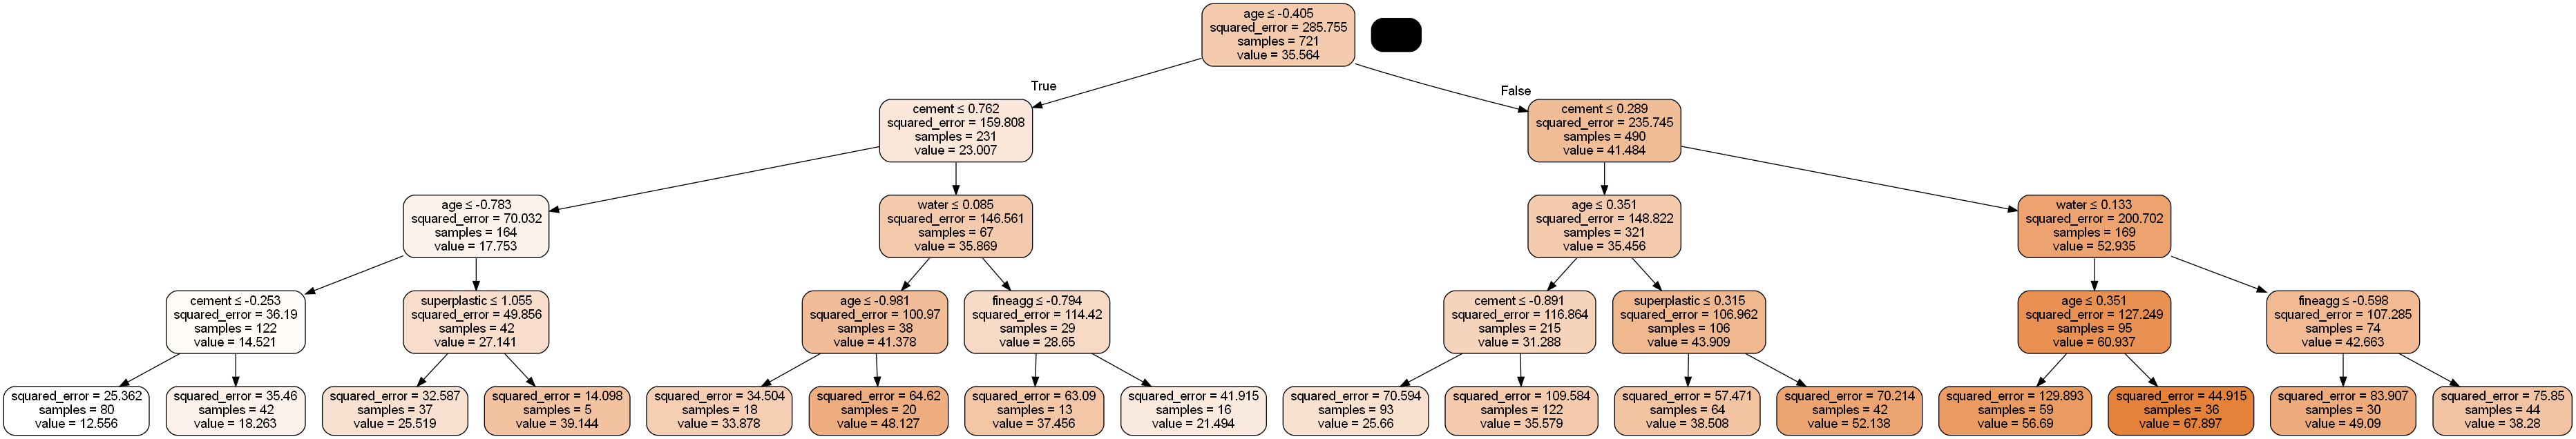

In [149]:
dot_data = StringIO()
export_graphviz(dec_prun_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0','1'])
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')


Image(graph.create_png())

In [150]:
y_pred = dec_prun_model.predict(X_test)

In [152]:
dec_prun_model.score(X_train, y_train)

0.7578225840644413

In [153]:
dec_prun_model.score(X_test, y_test)

0.556820999525816

In [154]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

116.16040647585388

In [155]:
acc_PrunDec = metrics.r2_score(y_test, y_pred)
acc_PrunDec

<IPython.core.display.Javascript object>

0.556820999525816

In [160]:
DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree'], 'accuracy': [acc_PrunDec]}, index=[17])
results = pd.concat([results, DecT_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


In [162]:
k=20

kfold = KFold(n_splits=k)
result_9 = cross_val_score(dec_prun_model, X, y, cv=kfold)
accuracy=np.mean(abs(result_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.44792037352404224

In [163]:
decTKFold_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree k fold'], 'accuracy': [accuracy]}, index=[18])
results = pd.concat([results, decTKFold_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.873010
2,Random Forest Regressor k_fold,0.761706
3,Gradient Boost Regressor,0.880284
4,Gradient Boost Regressor k fold,0.769666
5,Ada Boosting Regressor,0.757389
6,Ada Boosting Regressor k fold,0.595617
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.851291
10,Bagging Regressor k fold,0.734812


**Gradient Boost Regressor, Support Vector Regressor, Bagging Regressor** and **Random Forest** seems to do well in the scenario. We can choose either of them.

NB: You can again drop the features that are not important and rebuild the models again(consider doing hyperparameter tuning using GridSearchCV)